In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%pylab inline
from matplotlib import pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<h1>Q1: Read in data</h1>

In [2]:
gold = pd.read_csv('gold.txt',sep='\t',header=None)
gold.rename(columns={0:"url", 1:"category"}, inplace=True)
labels = pd.read_csv('labels.txt',sep='\t',header=None)
labels.rename(columns={0:"turk", 1:"url", 2:"category"}, inplace=True)

In [3]:
gold

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X
...,...,...
1512,http://zipcodez.com,G
1513,http://zml.com,P
1514,http://zonezero.com,G
1515,http://zooped.com,R


In [4]:
labels

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


<h1>Q2: Split into two DataFrames</h1>

In [5]:
#labels_on_gold=pd.merge(labels,gold,on='url', how='inner')
labels_on_gold= labels[labels['url'].isin(gold['url'])]
labels_unknown= labels[~labels['url'].isin(gold['url'])]
labels_unknown

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


<h1>Q3:  Compute accuracies of turks</h1>

As we need to compute count of ratings, it is a good idea to drop duplicates now

In [6]:
#labels_on_gold=labels_on_gold.drop_duplicates()
#labels_unknown=labels_unknown.drop_duplicates()

labels_gold=pd.merge(labels_on_gold,gold,on='url', how='inner')
label_by_turk=labels_gold.groupby(by='turk')['category_x'].count()


label_by_correct=pd.merge
label_by_turk

turk
A112DVP1KG4QZU      1
A1253FXHCZ9CWM     29
A12CY1Q7XKJJDE      1
A12RE8G66WTO8B     20
A12Y1GTGIQDGRA      3
                 ... 
AYWOBMTEGFVVI       1
AZ1S5BIG5R6P6      35
AZSDW7JJL5VA7     100
AZVB3RZW0OR1H       3
amurray            15
Name: category_x, Length: 269, dtype: int64

In [7]:
labels_gold=pd.merge(labels_on_gold,gold,on='url', how='inner')
labels_gold['flag']=labels_gold['category_x']==labels_gold['category_y']
labels_temp=labels_gold.groupby(['turk'])['flag'].agg(['count','mean']).reset_index()
rater_goodness = labels_temp.rename(columns={'count' : 'number_of_ratings', 'mean' : 'average_correctness'}).set_index('turk')
rater_goodness

,number_of_ratings,average_correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
...,...,...
AYWOBMTEGFVVI,1,0.000000
AZ1S5BIG5R6P6,35,0.714286
AZSDW7JJL5VA7,100,0.680000


<h1>Q4: Odds Ratio</h1>

In [8]:
rater_goodness['odds'] = rater_goodness['average_correctness']/ (1.001-rater_goodness['average_correctness'])
rater_goodness

,number_of_ratings,average_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


<h1>Q5:  Most accurate turks</h1>

In [9]:
rater_goodness[rater_goodness['number_of_ratings'] >= 20].sort_values(by = 'average_correctness',ascending = False)[:10]

,number_of_ratings,average_correctness,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


<h1>Q6: Rating counts versus accuracy</h1>

In [10]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('average_correctness~ number_of_ratings', data=rater_goodness, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()      
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     average_correctness   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.5488
Date:                 Wed, 03 Aug 2022   Prob (F-statistic):              0.459
Time:                         14:57:30   Log-Likelihood:                -94.663
No. Observations:                  269   AIC:                             193.3
Df Residuals:                      267   BIC:                             200.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6431

As we can see the coefficient of number_of_ratings is very close to zero, hence it shows that number of ratings does not have an effect on the average correctedness. The P>|t| value is also greater than 0.05, which means that number_of_ratings is not statistically significant for calculating the average correctness. Moreover, the R-squared is only 0.002, meaning that numbers of ratings only explain 0.2% of the variation in accuracy

Text(0, 0.5, 'Accuracy')

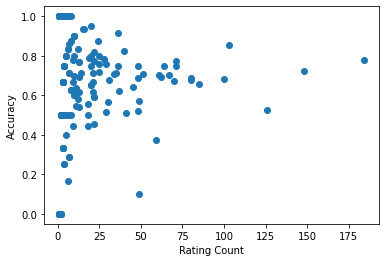

In [11]:
plot(rater_goodness['number_of_ratings'], rater_goodness['average_correctness'], marker ='o',
    linestyle = "None")
xlabel('Rating Count')
ylabel('Accuracy')

We can see that for certain data points, some of the turks have a low rating count but have almost 100% accuracy but for the turks which have high rating count do not have that level of accuracy. This can mean that some turks focus on having a higher rating count over accuracy, making their ratings unreliable. Whereas some have lower rating count but higher accuracy, making their ratings more reliable. We can sede opposite cases as well. Overall speaking, there seems to be no general pattern

<h1>Q7: Overall Predicted Odds</h1>

In [12]:
rater_75 = rater_goodness[rater_goodness['number_of_ratings']>rater_goodness['number_of_ratings'].quantile(.75)] #taking that 75%-100% quantile of num of ratings
reset_75 = rater_75.reset_index() #resetting index to include turk as column
labels_unknown[labels_unknown['turk'].isin(reset_75['turk'])] #finding the turks that are in the reset_75 that are also in labels_unknown
temp_turks = labels_unknown.merge(reset_75, on=['turk']) #merging the two datasets to access the odds

In [13]:
grps = temp_turks.groupby(['url', 'category'])['odds'].prod() #grouping temp_turks by the tuple of url and category and outputting the product of each group's respective odds
overall = DataFrame(grps)
overall

odds
url                         category           
http://0-101.net            G          2.155963
http://000.cc               G          1.460583
http://0000.jp              G         14.488244
http://000relationships.com G          5.681060
                            P          1.851852
...                                         ...
http://zynga.com            G          3.704611
http://zz868.com            G          1.047852
                            P          1.851852
http://zzx.cc               G          1.330229
                            X          1.620746

[13983 rows x 1 columns]

# Q8: Predicted categories 

In [14]:
overall_odds = overall.unstack("category") #unstacking to make it it (url, category) pairs
overall_odds
top_cate = DataFrame(overall_odds['odds'].T.idxmax())
top_odds = DataFrame(overall_odds['odds'].T.max())
result_75 = top_cate.merge(top_odds,left_on = 'url',right_on = 'url')
result_75.columns=['top category','top odds'] 
result_75



,top category,top odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,5.681060
http://000vitamins.com,G,3.784982
...,...,...
http://zwinky.com,G,16.141443
http://zylom.com,G,1.735526
http://zynga.com,G,3.704611


# Q9: Predicted categories using more turks

In [15]:
rater_25 = rater_goodness[rater_goodness['number_of_ratings']>rater_goodness['number_of_ratings'].quantile(.25)] 
reset_25 = rater_25.reset_index() #resetting index to include turk as column
labels_unknown[labels_unknown['turk'].isin(reset_25['turk'])] #finding the turks that are in the reset_75 that are also in labels_unknown
temp_turks = labels_unknown.merge(reset_25, on=['turk']) #merging the two datasets to access the odds
grps = temp_turks.groupby(['url', 'category'])['odds'].prod() #grouping temp_turks by the tuple of url and category and outputting the product of each group's respective odds
overall = DataFrame(grps)
overall_odds = overall.unstack("category") #unstacking to make it it (url, category) pairs
overall_odds
top_cate = DataFrame(overall_odds['odds'].T.idxmax())
top_odds = DataFrame(overall_odds['odds'].T.max())
result_25 = top_cate.merge(top_odds,left_on = 'url',right_on = 'url')
result_25.columns=['top category','top odds'] 
result_25
merge = result_75.merge(result_25, left_on = 'url',right_on = 'url', suffixes = ['_75','_25'])
most_errors = pd.crosstab(merge['top category_75'],merge['top category_25'])
most_errors

top category_25,G,P,R,X
top category_75,,,,
G,8327,574,186,216
P,189,328,47,19
R,21,34,128,25
X,27,6,26,457


Category_75's G is classified as category_25's P the most number of times. Hence most errors occur in this combination.